In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import xlrd
import statsmodels.api as sm
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression

In [3]:
from statsmodels.tsa import stattools
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.stattools import adfuller

In [4]:
file1 = 'C:\\btc_2012.xlsx'

In [5]:
f = pd.read_excel(file1, skiprows=5)
df = pd.DataFrame(f)

In [6]:
df.columns = ['date', 'btc', 'dxy', 'spx', 'ust10r', 'inf', 'vix']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2637 non-null   datetime64[ns]
 1   btc     2610 non-null   float64       
 2   dxy     2635 non-null   float64       
 3   spx     2543 non-null   float64       
 4   ust10r  2635 non-null   float64       
 5   inf     2635 non-null   float64       
 6   vix     2544 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 144.3 KB


In [8]:
# Set DateTime index
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.set_index('date', inplace=True)

In [9]:
df.head(20)

,btc,dxy,spx,ust10r,inf,vix
date,,,,,,
2022-02-09,43387.94,95.549,NaN,-0.5094,2.4230,21.20
2022-02-08,44230.11,95.643,4521.54,-0.4698,2.4210,21.44
2022-02-07,44102.99,95.399,4483.87,-0.4972,2.4170,22.86
2022-02-04,40647.25,95.485,4500.53,-0.5052,2.3971,23.22
2022-02-03,36964.58,95.379,4477.44,-0.5806,2.4025,24.35
2022-02-02,36936.93,95.936,4589.38,-0.6543,2.4136,22.09
2022-02-01,38813.82,96.385,4546.54,-0.6533,2.4570,21.96
2022-01-31,38437.84,96.540,4515.55,-0.7120,2.5145,24.83
2022-01-28,37807.95,97.270,4431.85,-0.6943,2.4794,27.66


# Data Engineering

In [10]:
df.fillna(method='bfill', inplace=True)

In [11]:
df.head(20)

,btc,dxy,spx,ust10r,inf,vix
date,,,,,,
2022-02-09,43387.94,95.549,4521.54,-0.5094,2.4230,21.20
2022-02-08,44230.11,95.643,4521.54,-0.4698,2.4210,21.44
2022-02-07,44102.99,95.399,4483.87,-0.4972,2.4170,22.86
2022-02-04,40647.25,95.485,4500.53,-0.5052,2.3971,23.22
2022-02-03,36964.58,95.379,4477.44,-0.5806,2.4025,24.35
2022-02-02,36936.93,95.936,4589.38,-0.6543,2.4136,22.09
2022-02-01,38813.82,96.385,4546.54,-0.6533,2.4570,21.96
2022-01-31,38437.84,96.540,4515.55,-0.7120,2.5145,24.83
2022-01-28,37807.95,97.270,4431.85,-0.6943,2.4794,27.66


In [12]:
# Applying log change transformation
df1 = df[['btc', 'dxy', 'spx', 'vix']]

In [13]:
df1 = np.log(df1/df1.shift(-1))

In [14]:
df1.columns = ['btcd', 'dxyd', 'spxd', 'vixd']

In [15]:
df1

,btcd,dxyd,spxd,vixd
date,,,,
2022-02-09,-0.019224,-0.000983,0.000000,-0.011257
2022-02-08,0.002878,0.002554,0.008366,-0.064130
2022-02-07,0.081596,-0.000901,-0.003709,-0.015625
2022-02-04,0.094971,0.001111,0.005144,-0.047518
2022-02-03,0.000748,-0.005823,-0.024693,0.097407
...,...,...,...,...
2012-01-09,-0.056807,-0.002501,0.002259,0.021104
2012-01-06,-0.036634,0.003921,-0.002540,-0.040376
2012-01-05,0.221347,0.010021,0.002939,-0.033871


In [16]:
# Change in basis points for the interest rate variables as per industry practice
df2 = df[['ust10r', 'inf']].diff(-1)*100

In [17]:
df2.columns = ['ust10rd', 'infd']

In [18]:
df2

,ust10rd,infd
date,,
2022-02-09,-3.96,0.20
2022-02-08,2.74,0.40
2022-02-07,0.80,1.99
2022-02-04,7.54,-0.54
2022-02-03,7.37,-1.11
...,...,...
2012-01-09,-0.80,1.50
2012-01-06,-1.71,-0.50
2012-01-05,-1.67,4.10


In [19]:
df3 = df[['vix']]

## Reconstituting the data

In [20]:
# Putting transformed data together again
df = pd.concat([df1, df2, df3], axis = 1)

In [21]:
# Delete the first row of null values following transformations
df = df.iloc[:-1]

In [22]:
df

,btcd,dxyd,spxd,vixd,ust10rd,infd,vix
date,,,,,,,
2022-02-09,-0.019224,-0.000983,0.000000,-0.011257,-3.96,0.20,21.20
2022-02-08,0.002878,0.002554,0.008366,-0.064130,2.74,0.40,21.44
2022-02-07,0.081596,-0.000901,-0.003709,-0.015625,0.80,1.99,22.86
2022-02-04,0.094971,0.001111,0.005144,-0.047518,7.54,-0.54,23.22
2022-02-03,0.000748,-0.005823,-0.024693,0.097407,7.37,-1.11,24.35
...,...,...,...,...,...,...,...
2012-01-10,0.004728,-0.003040,0.008847,-0.018200,4.28,-2.55,20.69
2012-01-09,-0.056807,-0.002501,0.002259,0.021104,-0.80,1.50,21.07
2012-01-06,-0.036634,0.003921,-0.002540,-0.040376,-1.71,-0.50,20.63


In [23]:
df.describe()

,btcd,dxyd,spxd,vixd,ust10rd,infd,vix
count,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000,2636.000000
mean,0.003449,0.000069,0.000480,-0.000030,-0.015258,-0.009124,17.124666
std,0.053699,0.004028,0.010171,0.078362,4.158800,4.167828,6.782058
min,-0.600939,-0.024008,-0.127652,-0.299831,-50.720000,-31.670000,9.140000
25%,-0.013656,-0.002257,-0.003045,-0.042283,-2.342500,-2.072500,13.020000
50%,0.002228,0.000000,0.000393,-0.002779,-0.075000,0.000000,15.435000
75%,0.022161,0.002245,0.004982,0.034427,2.232500,2.132500,19.085000
max,0.517036,0.020310,0.089683,0.768245,40.580000,28.710000,82.690000


# Functions

In [24]:
def correlation_matrix(df, title=''):
    """
    Generate a correlation matrix using Matplotlib
    df: DataFrame of interest for correlations
    title: String describing the phenomenon of interest
    """    
    fig, ax = plt.subplots(figsize=(12, 10))

    sns.set(font_scale=1.0)
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=12)
    ax.set_title(f'Correlation Matrix of {title}', fontsize=16)
    plt.show()

In [25]:
def rolling_ols(n, df_y, df_x):
    """
    Function to compute the rolling Coefficient (of the first variable) and 
    R-squared of linear regressions running through a DF of explanatory variables
    n: Rolling period window size (integer)
    df_y: DataFrame with DateTime index containing dependent variables of interest as columns
    df_x: DataFrame with explanatory variables of interest
    """
    beta = []
    rsqr = []
    
    length = len(df_y)
    x = df_x.iloc[::-1].to_numpy() # Flipping the order of the DataFrame
    y = df_y.iloc[::-1].to_numpy() # Flipping the order of the DataFrame

    for i in range(n, length):
        x_temp = x[i-n:i]
        y_temp = y[i-n:i]
    
        ols_roll = sm.OLS(y_temp, sm.add_constant(x_temp)).fit()
        beta.append(ols_roll.params[1]) # Only capturing the coefficient of the first explanatory variable
        rsqr.append(ols_roll.rsquared)
        
    results = pd.DataFrame({'beta': beta, 'rsqr': rsqr})
    results.index = df_y.iloc[::-1].iloc[n:].index
        
    return results


In [26]:
def adf_statistics(time_series):
    """
    Function to executre augmented Dickey-Fuller test for stationarity
    """
    result = adfuller(time_series.values)
    if result[1] < 0.0500:             # result[1] contains the p-value
        return 0                       # returns 0 value if p-value of test is under 5%
    else:
        return 1
    

In [27]:
def adf_tests(df):
    """
    Function to execute ADF test on every column in a DataFrame
    """
    results = df.apply(adf_statistics, axis=0) # Output is a Pandas series
    if sum(results)==0:
        print('Null hypothesis of non-stationarity is rejected for ALL series with p-values < 5%')
    else:
        for i, v in results.items():
            if v == 1:
                print(f'Null hypothesis of non-stationarity of {i} series is NOT rejected')
            else:
                print(f'Null hypothesis of non-stationarity of {i} series is rejected')    
        

# Correlation Analysis

### Stationarity tests

In [28]:
# All variables have been rendered staationary by the data engineering above
adf_tests(df.iloc[:, :-1])

Null hypothesis of non-stationarity is rejected for ALL series with p-values < 5%


C:\Users\Tan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


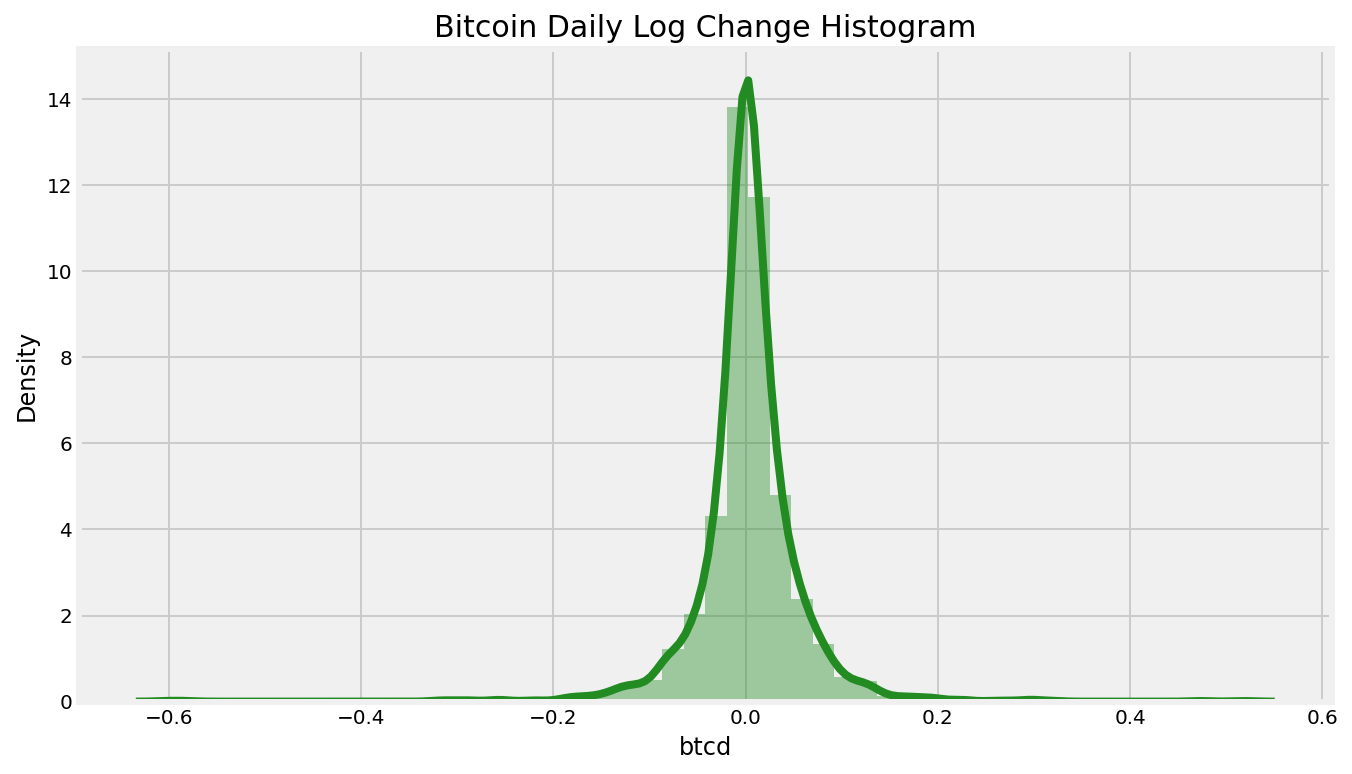

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.distplot(df.btcd, bins=50, kde=True, ax=ax, color='forestgreen')
plt.title('Bitcoin Daily Log Change Histogram', fontsize=15);

In [30]:
# Some extreme positive one-day changes in Bitcoin
df[['btcd']].nlargest(10, ['btcd'])

,btcd
date,
2013-12-09,0.517036
2013-11-18,0.473796
2013-04-18,0.318671
2014-02-25,0.300641
2013-04-08,0.296746
2017-12-01,0.292610
2014-12-04,0.271810
2013-04-02,0.257829
2013-12-19,0.226285


In [31]:
df[['btcd']].nsmallest(10, ['btcd'])

,btcd
date,
2013-04-11,-0.600939
2013-12-06,-0.583867
2020-03-12,-0.317282
2013-12-17,-0.312315
2013-11-19,-0.291134
2014-12-03,-0.288904
2018-01-16,-0.260987
2015-01-14,-0.254175
2013-04-10,-0.254087


In [32]:
# There are two extreme positive outliers in Bitcoin's daily price change that are more than 6 standard deviations away
df.btcd[(df.btcd > np.mean(df.btcd) + 6*np.std(df.btcd))].count()

2

In [33]:
# There are also two extreme negative outliers in Bitcoin's daily price change data
df.btcd[(df.btcd < np.mean(df.btcd) - 6*np.std(df.btcd))].count()

2

In [34]:
btcd_mean = df.btcd.mean()
btcd_std = df.btcd.std()

In [35]:
# Deleting the two positive outliers
df = df[(df.btcd < np.mean(df.btcd) + 6*np.std(df.btcd))]

In [36]:
# Deleting the two negative outliers
df = df[(df.btcd > btcd_mean - 6*btcd_std)]

C:\Users\Tan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


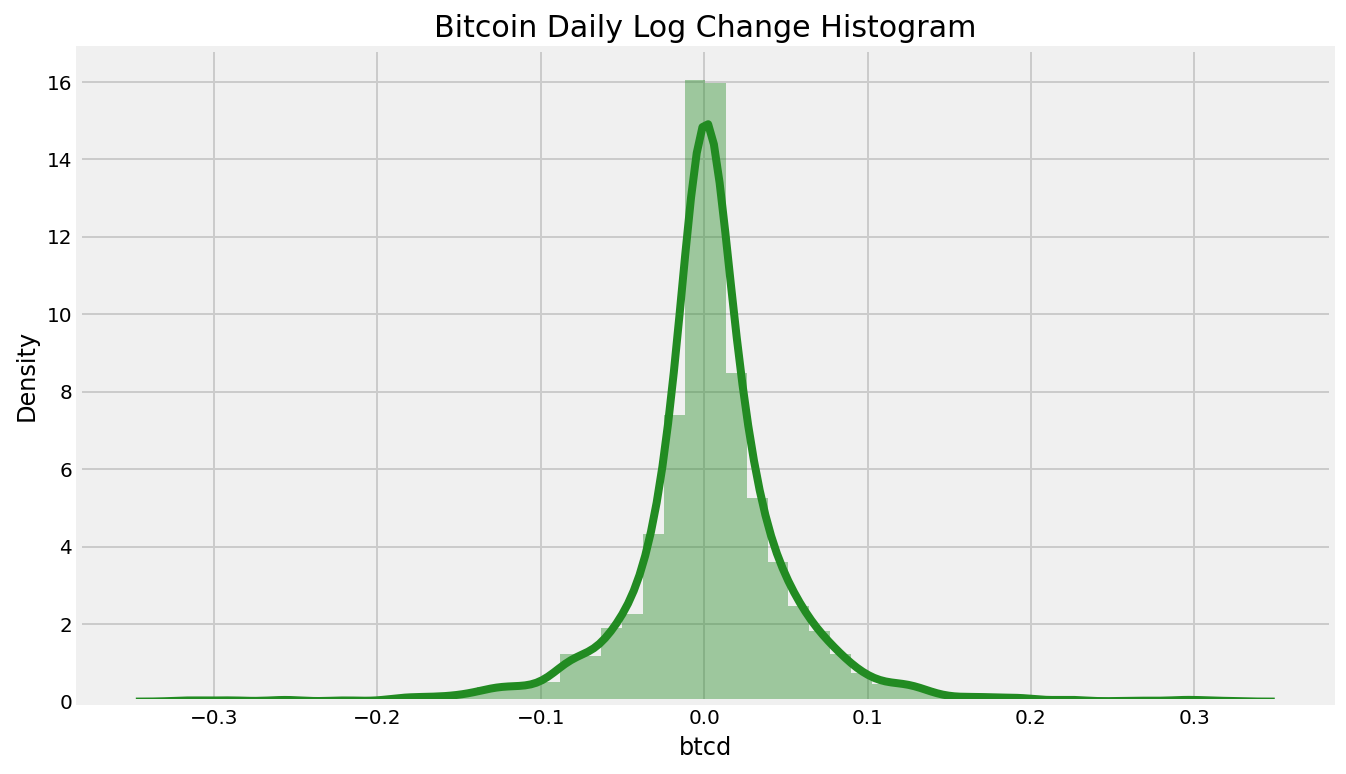

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.distplot(df.btcd, bins=50, kde=True, ax=ax, color='forestgreen')
plt.title('Bitcoin Daily Log Change Histogram', fontsize=15);

Deleting the **four outlier observations in "btcd"**, two on each side of the distribution, tightens the distributional spread of the daily data.

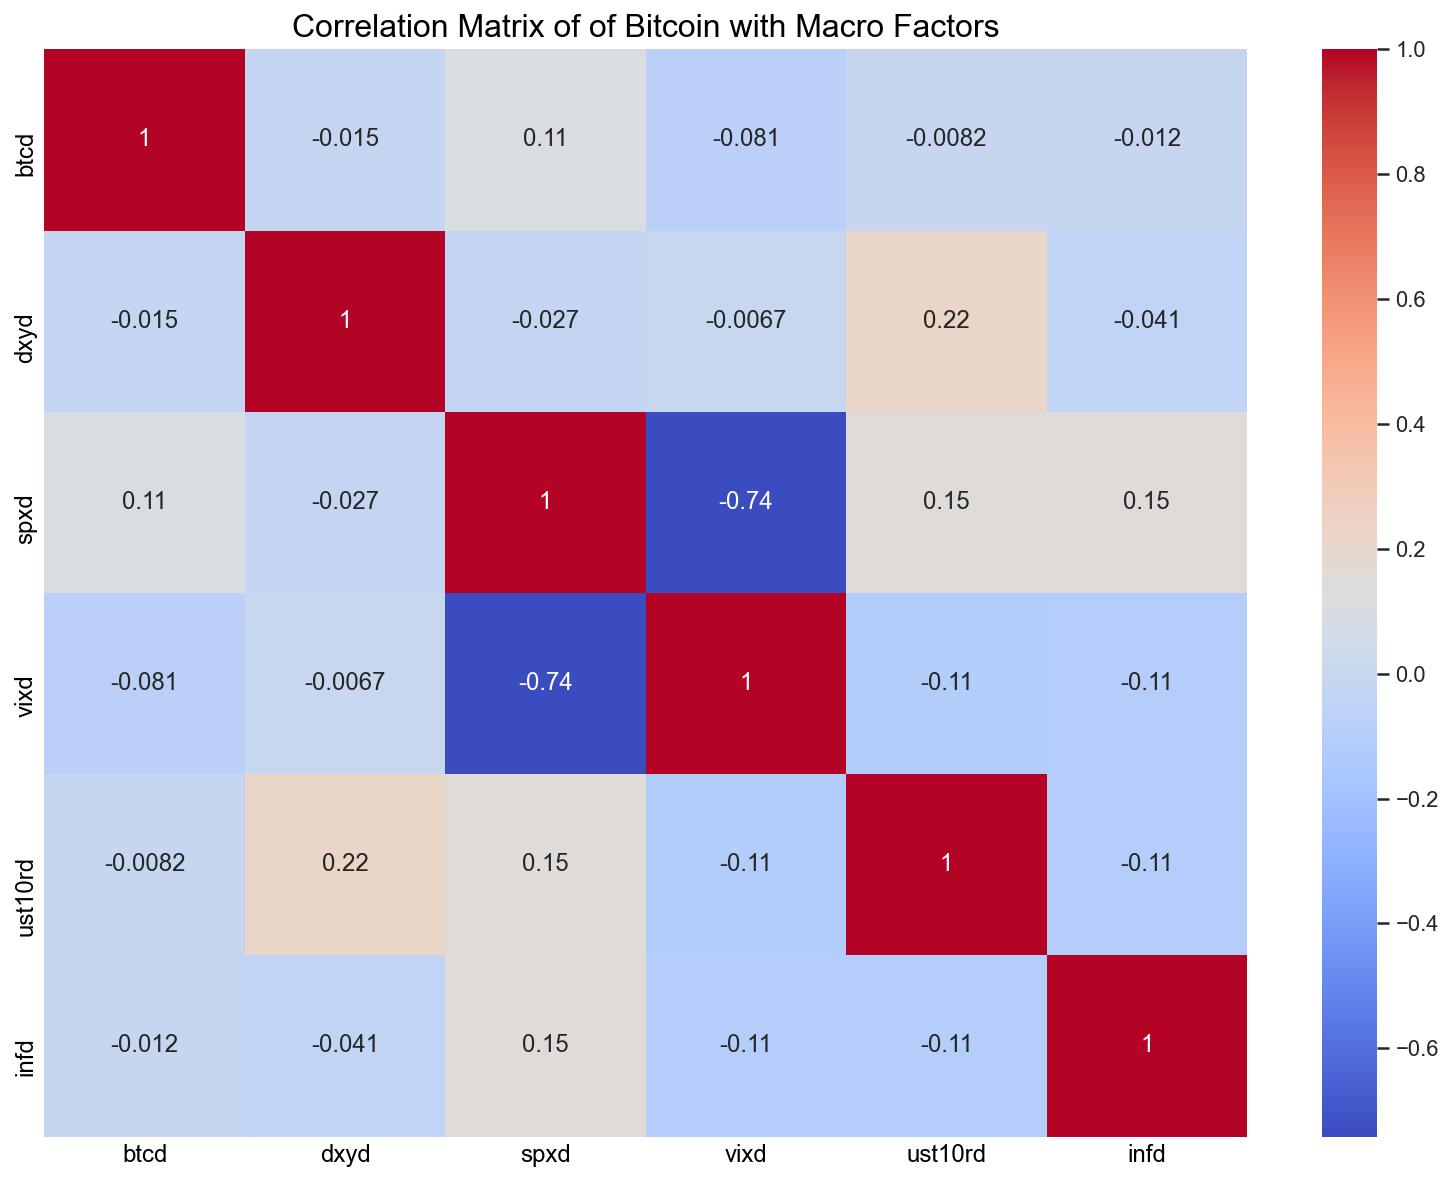

In [38]:
correlation_matrix(df.iloc[:, :-1], title='of Bitcoin with Macro Factors')

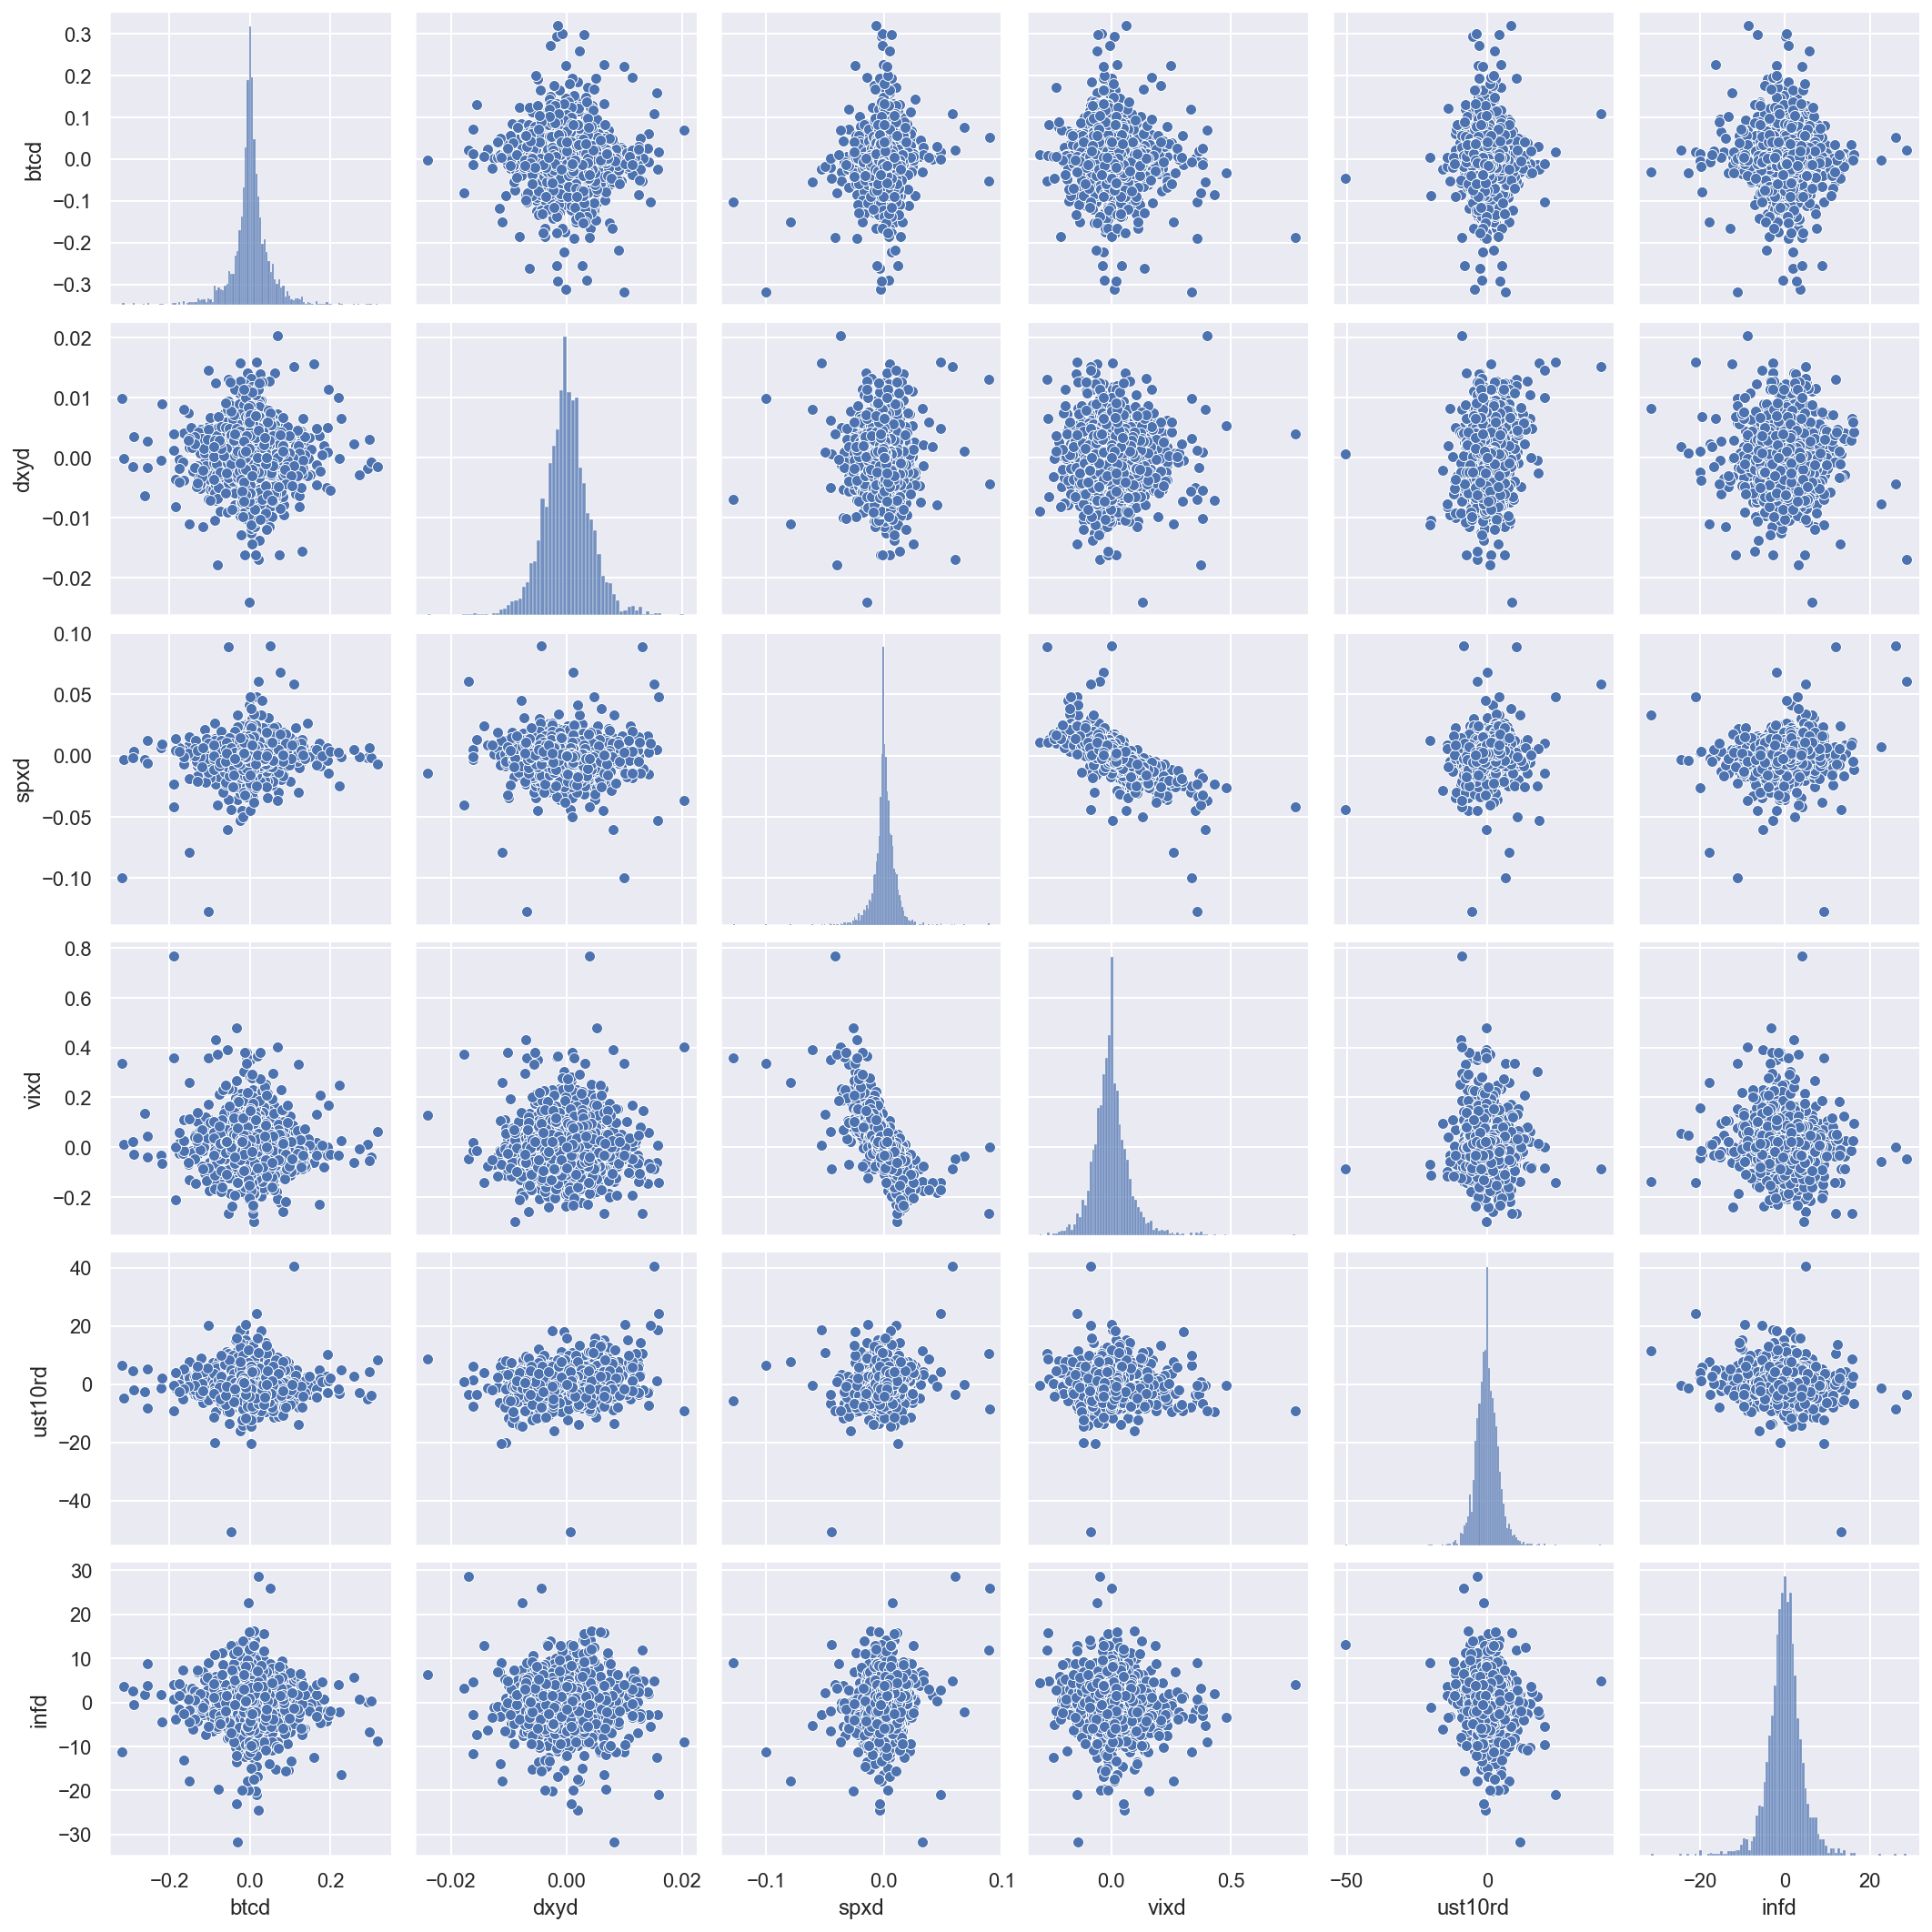

In [39]:
sns.pairplot(df.iloc[:, :-1]);

## Rolling Betas

In [40]:
params1 = rolling_ols(252, df[['btcd']], df[['spxd']])

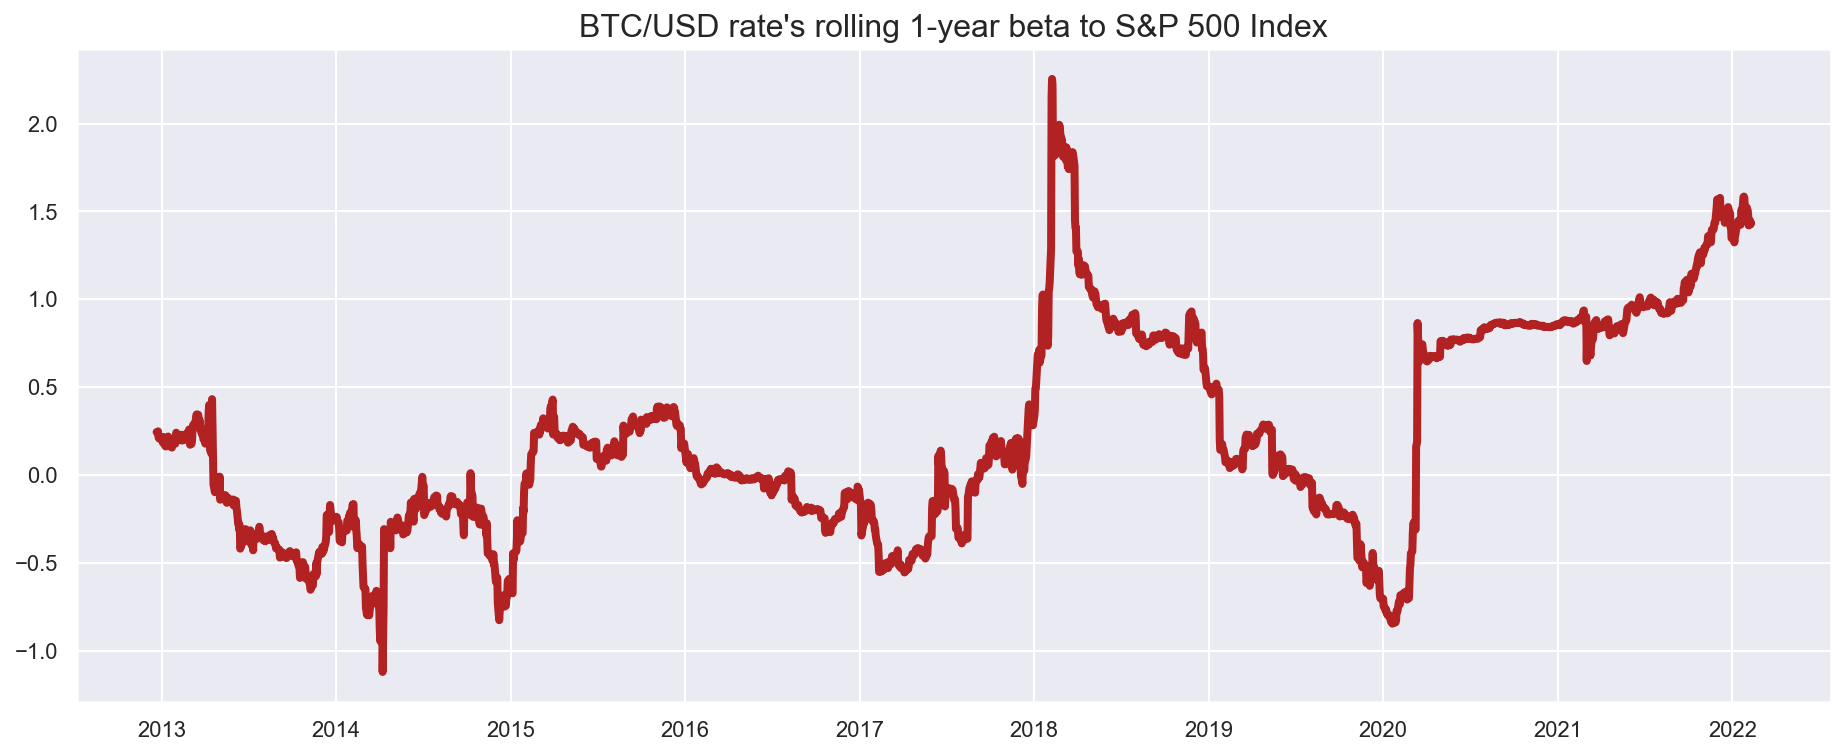

In [41]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(params1.beta, lw='4', color='firebrick', )
plt.title("BTC/USD rate's rolling 1-year beta to S&P 500 Index", fontsize=16);

Bitcoin's time-varying beta to the US stock market shows how the **relationship to strengthened considerably and durably** since the pandemic started in January 2020.

# Separate Into Pre-Pandemic and Pandemic Periods

The **first US Covid-19 case** was confirmed by the CDC on **21 January 2020**. Let's just use that date as the cutoff dates to distinguish between the pre-pandemic and current pandemic periods.

In [42]:
cutoff_date = '2020-01-21'

In [43]:
df_pre = df.loc[df.index < cutoff_date]

In [44]:
df_post = df.loc[df.index >= cutoff_date]

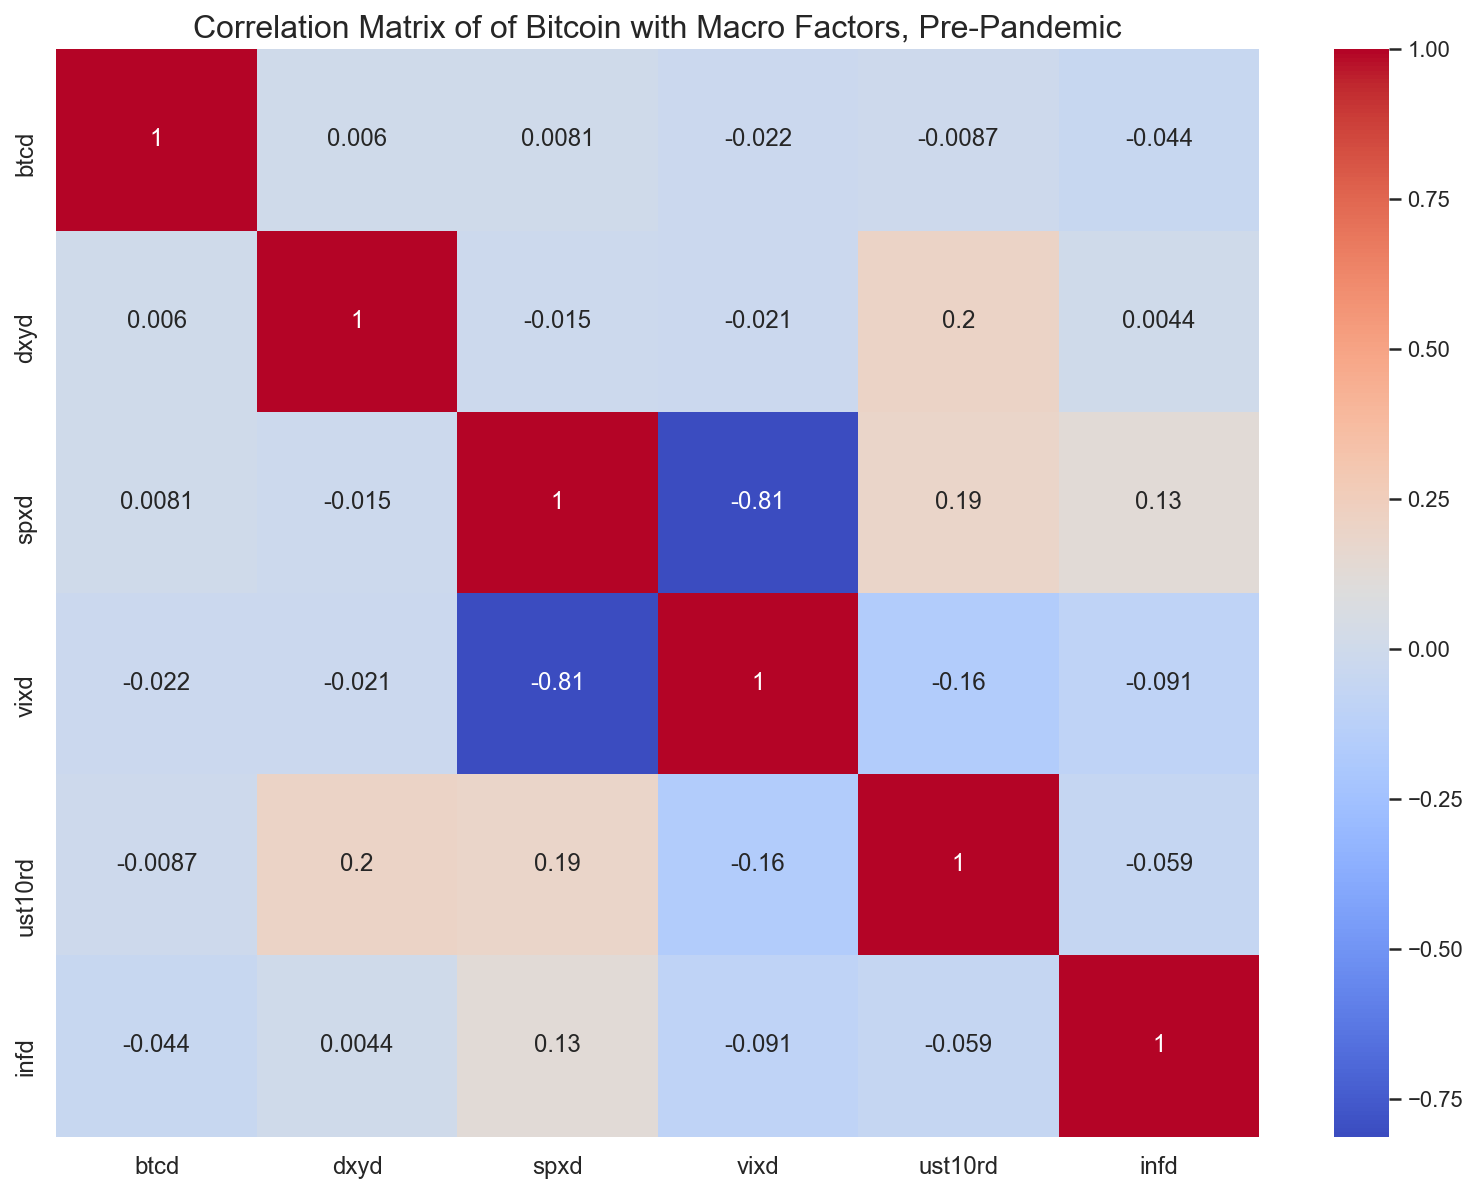

In [45]:
correlation_matrix(df_pre.iloc[:, :-1], title='of Bitcoin with Macro Factors, Pre-Pandemic')

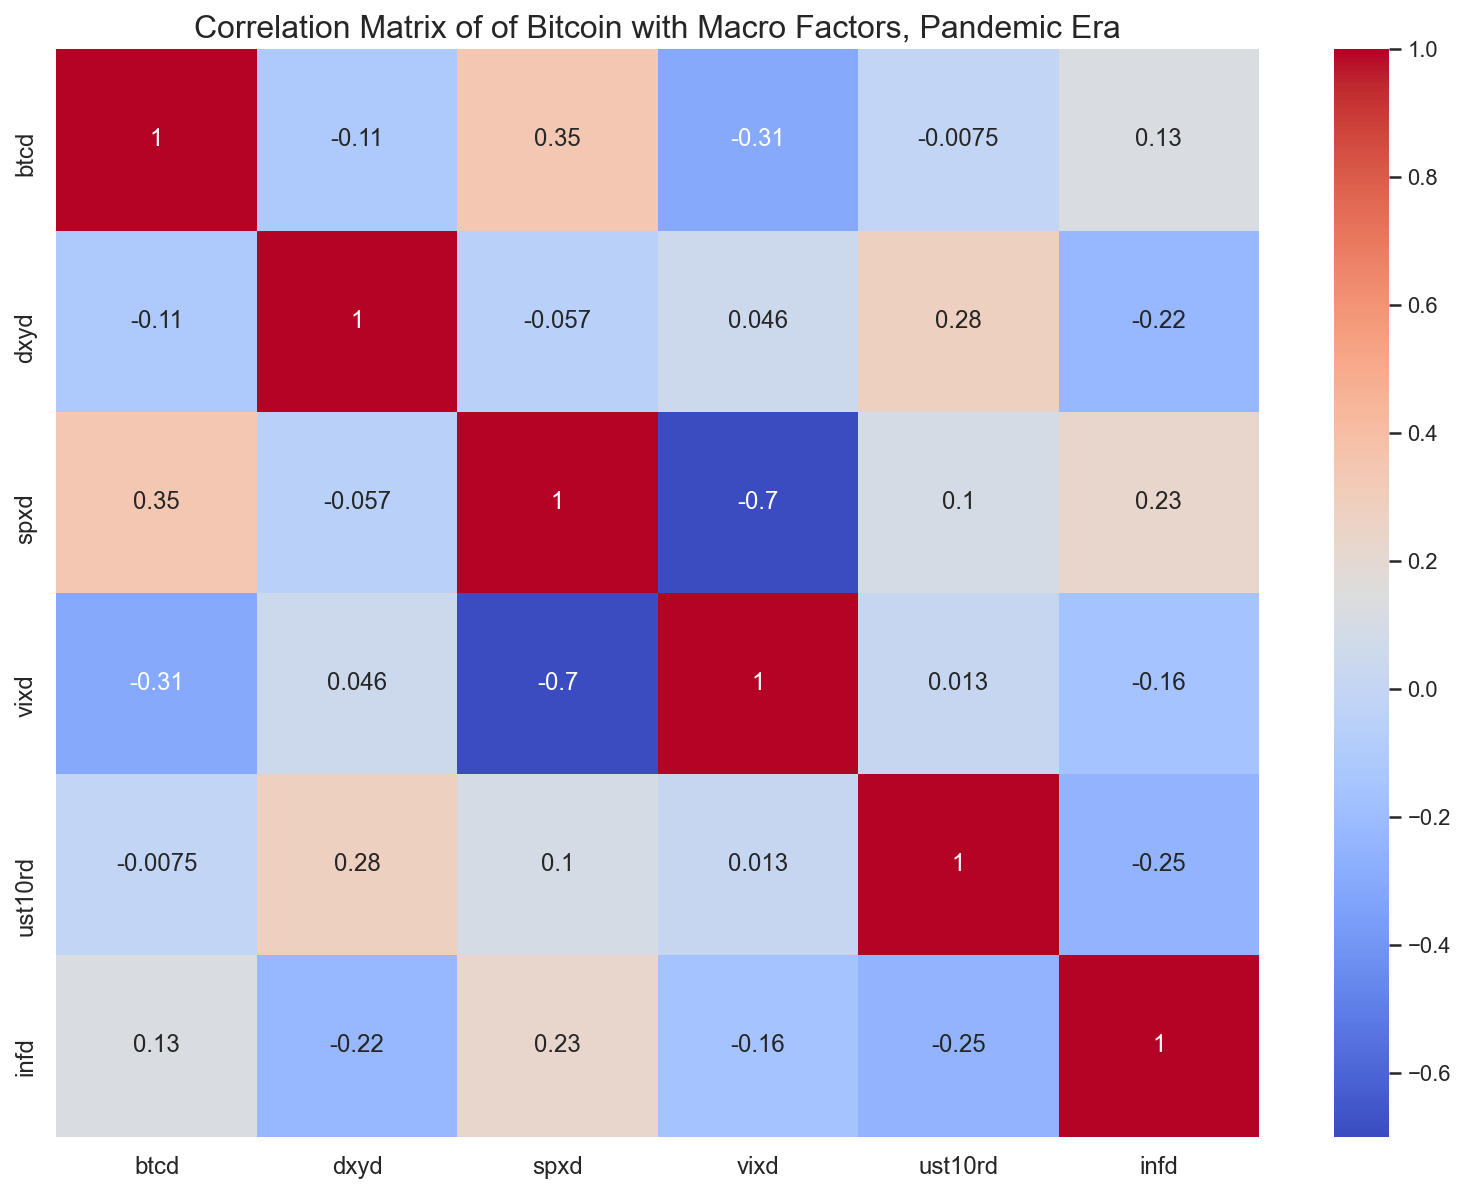

In [46]:
correlation_matrix(df_post.iloc[:, :-1], title='of Bitcoin with Macro Factors, Pandemic Era')

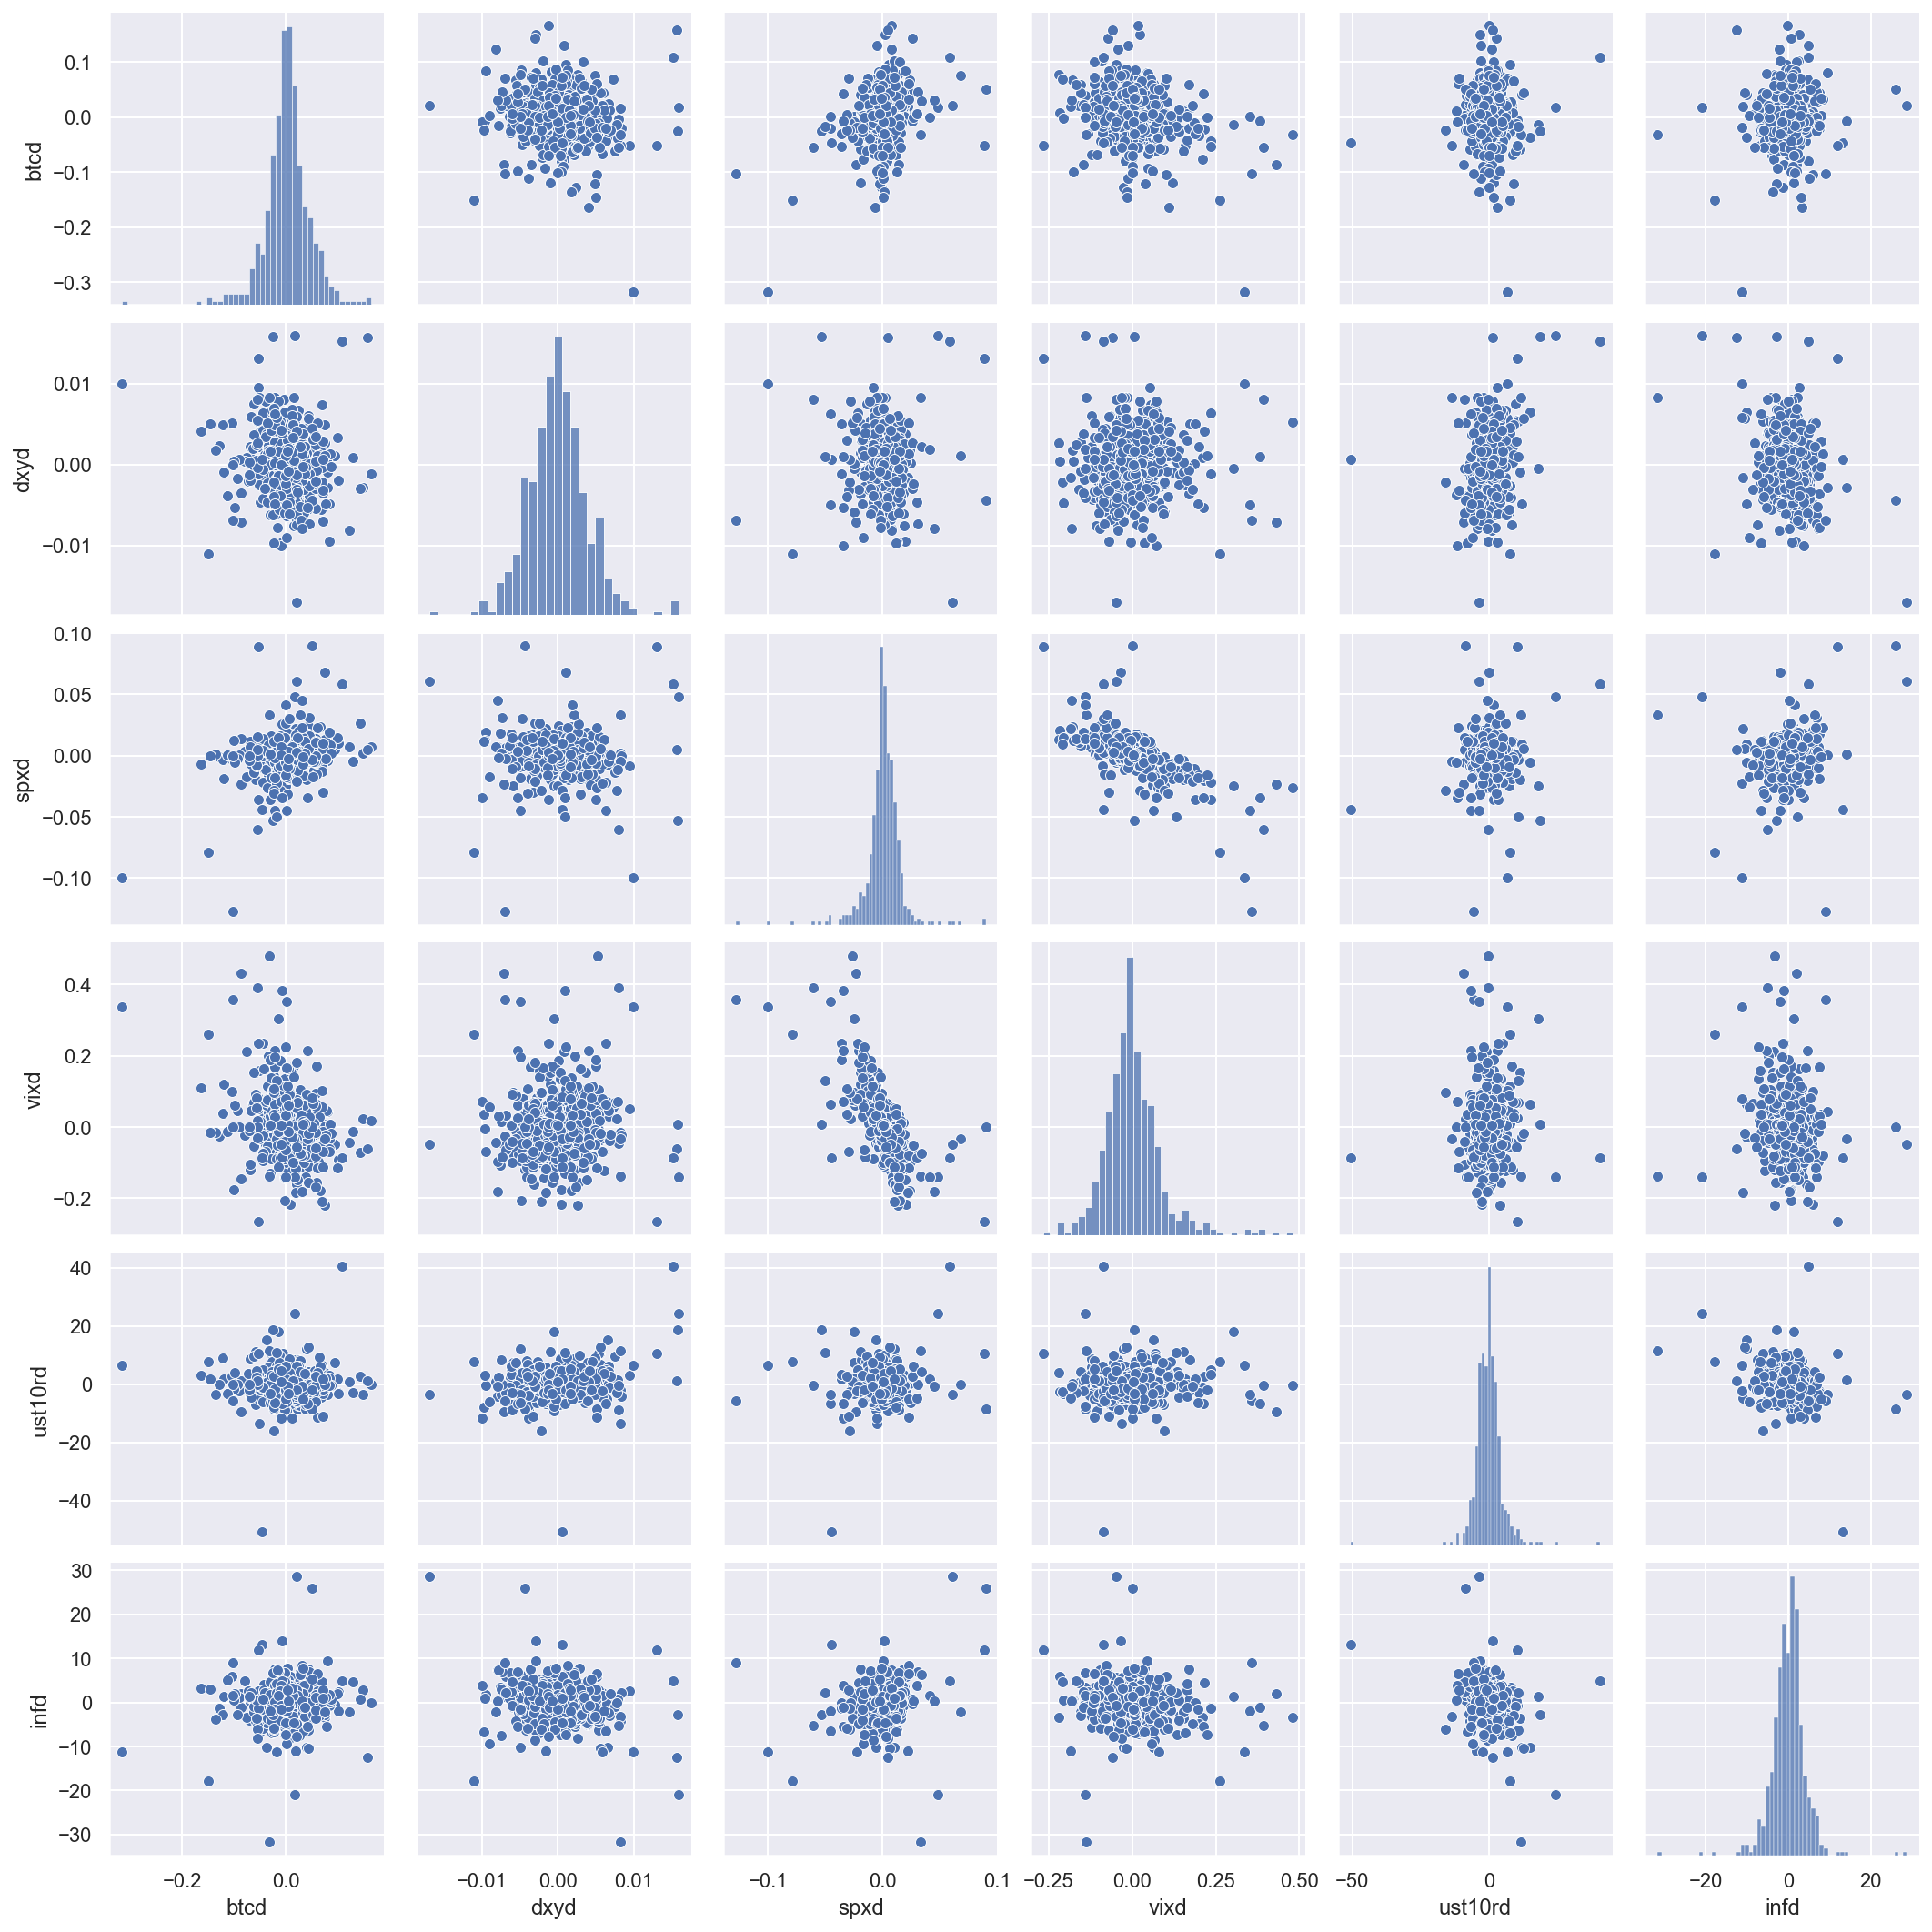

In [47]:
sns.pairplot(df_post.iloc[:, :-1]);

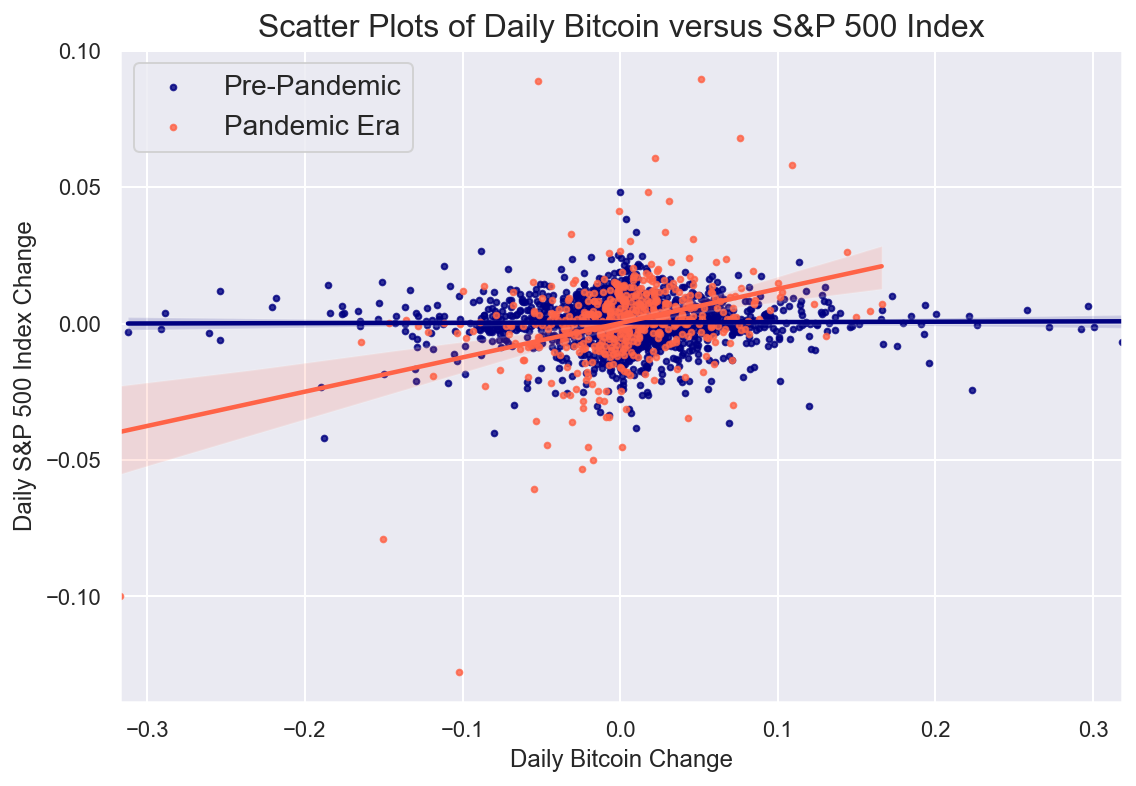

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(x="btcd", y="spxd", data=df_pre, scatter_kws={'s':8}, color='navy', ax=ax, label='Pre-Pandemic')
sns.regplot(x="btcd", y="spxd", data=df_post, scatter_kws={'s':8}, color='tomato', ax=ax, label='Pandemic Era')
plt.legend(loc='upper left', fontsize=14)

plt.ylabel('Daily S&P 500 Index Change', fontsize=12)
plt.xlabel('Daily Bitcoin Change', fontsize=12)
plt.title('Scatter Plots of Daily Bitcoin versus S&P 500 Index', fontsize=16);

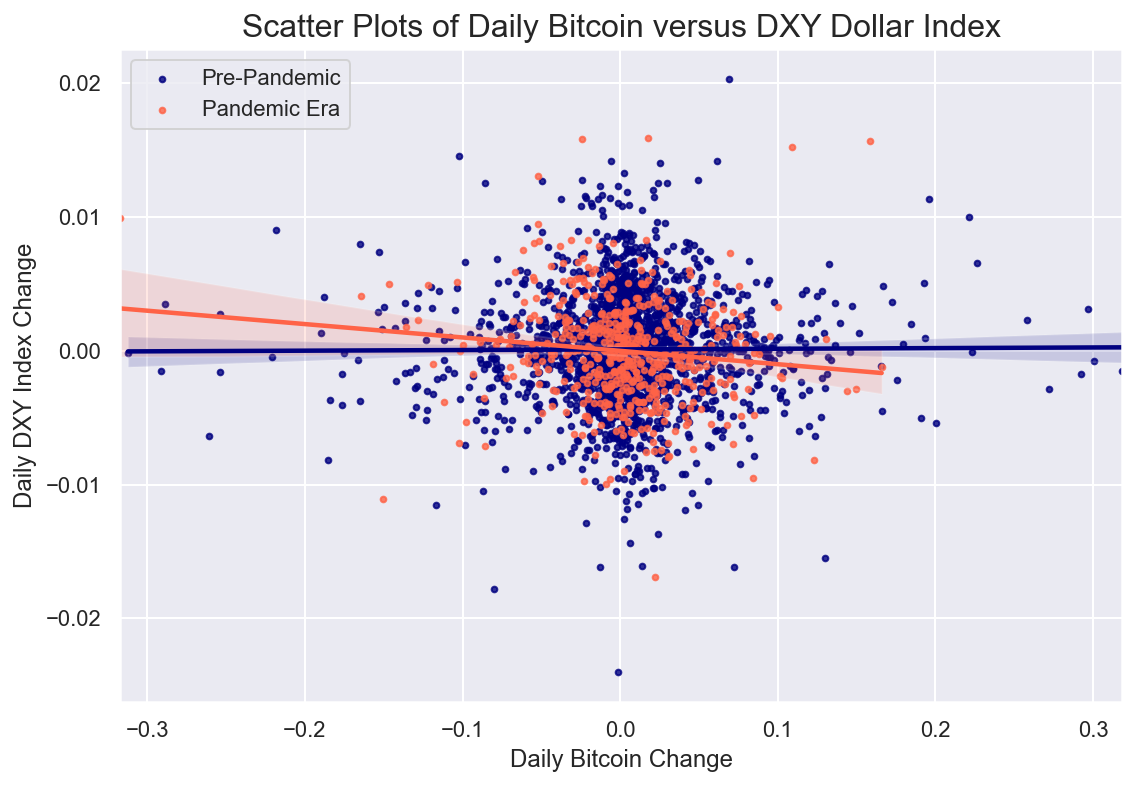

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(x="btcd", y="dxyd", data=df_pre, scatter_kws={'s':8}, color='navy', ax=ax, label='Pre-Pandemic')
sns.regplot(x="btcd", y="dxyd", data=df_post, scatter_kws={'s':8}, color='tomato', ax=ax, label='Pandemic Era')
plt.legend(loc='upper left')

plt.ylabel('Daily DXY Index Change', fontsize=12)
plt.xlabel('Daily Bitcoin Change', fontsize=12)
plt.title('Scatter Plots of Daily Bitcoin versus DXY Dollar Index', fontsize=16);

# Regression Analysis

### Create interaction variables for pre- and post-pandemic periods

In [50]:
df['pan_dummy'] = (df.index >= cutoff_date).astype(int)

In [51]:
df['pan_spxd'] = df.pan_dummy * df.spxd

In [52]:
df['pan_dxyd'] = df.pan_dummy * df.dxyd

In [53]:
df['pan_infd'] = df.pan_dummy * df.infd

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2632 entries, 2022-02-09 to 2012-01-04
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   btcd       2632 non-null   float64
 1   dxyd       2632 non-null   float64
 2   spxd       2632 non-null   float64
 3   vixd       2632 non-null   float64
 4   ust10rd    2632 non-null   float64
 5   infd       2632 non-null   float64
 6   vix        2632 non-null   float64
 7   pan_dummy  2632 non-null   int32  
 8   pan_spxd   2632 non-null   float64
 9   pan_dxyd   2632 non-null   float64
 10  pan_infd   2632 non-null   float64
dtypes: float64(10), int32(1)
memory usage: 236.5 KB


### First regression

In [55]:
y_btc = df['btcd']

In [56]:
X = df[['spxd', 'dxyd', 'infd', 'vixd']]

In [57]:
ols = sm.OLS(y_btc, sm.add_constant(X)).fit(cov_type='HC3')
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   btcd   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     4.018
Date:                Sat, 12 Feb 2022   Prob (F-statistic):            0.00298
Time:                        19:09:42   Log-Likelihood:                 4202.3
No. Observations:                2632   AIC:                            -8395.
Df Residuals:                    2627   BIC:                            -8365.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.001      3.405      0.001       0.001       0.005
spxd           0.5178      0.209      2.473      0.013       0.107       0.928
dxyd          -0.1671      0.256     -0.653      0.513      -0.668       0.334
infd          -0.0003      0.000     -1.377      0.168      -0.001       0.000
vixd          -0.0030      0.025     -0.121      0.904      -0.051       0.045
==============================================================================
Omnibus:                      389.912   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5949.900
Skew:                          -0.017   Prob(JB):                         0.00
Kurtosis:                      10.366   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Second regression

In [58]:
X = df[['spxd', 'dxyd', 'infd']]

In [59]:
ols = sm.OLS(y_btc, sm.add_constant(X)).fit(cov_type='HC3')
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   btcd   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     5.415
Date:                Sat, 12 Feb 2022   Prob (F-statistic):            0.00103
Time:                        19:09:42   Log-Likelihood:                 4202.2
No. Observations:                2632   AIC:                            -8396.
Df Residuals:                    2628   BIC:                            -8373.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.001      3.401      0.001       0.001       0.005
spxd           0.5348      0.142      3.771      0.000       0.257       0.813
dxyd          -0.1656      0.255     -0.649      0.516      -0.666       0.335
infd          -0.0003      0.000     -1.378      0.168      -0.001       0.000
==============================================================================
Omnibus:                      389.931   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5950.488
Skew:                          -0.017   Prob(JB):                         0.00
Kurtosis:                      10.366   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression with interaction terms only

In [60]:
X = df[['spxd', 'dxyd', 'infd', 'pan_spxd', 'pan_dxyd', 'pan_infd']]

In [61]:
ols_inter = sm.OLS(y_btc, sm.add_constant(X)).fit(cov_type='HC3')
ols_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   btcd   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     4.313
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           0.000246
Time:                        19:09:42   Log-Likelihood:                 4216.8
No. Observations:                2632   AIC:                            -8420.
Df Residuals:                    2625   BIC:                            -8379.
Df Model:                           6                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.001      3.499      0.000       0.001       0.005
spxd           0.0905      0.154      0.587      0.557      -0.212       0.393
dxyd           0.0807      0.273      0.296      0.767      -0.454       0.616
infd          -0.0006      0.000     -1.950      0.051      -0.001    2.91e-06
pan_spxd       0.8228      0.257      3.203      0.001       0.319       1.326
pan_dxyd      -1.1036      0.737     -1.497      0.134      -2.548       0.341
pan_infd       0.0009      0.001      1.459      0.145      -0.000       0.002
==============================================================================
Omnibus:                      386.334   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5789.479
Skew:                           0.003   Prob(JB):                         0.00
Kurtosis:                      10.266   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Full regression with dummy & interaction terms

In [62]:
X = df[['spxd', 'dxyd', 'infd', 'pan_dummy', 'pan_spxd', 'pan_dxyd', 'pan_infd']]

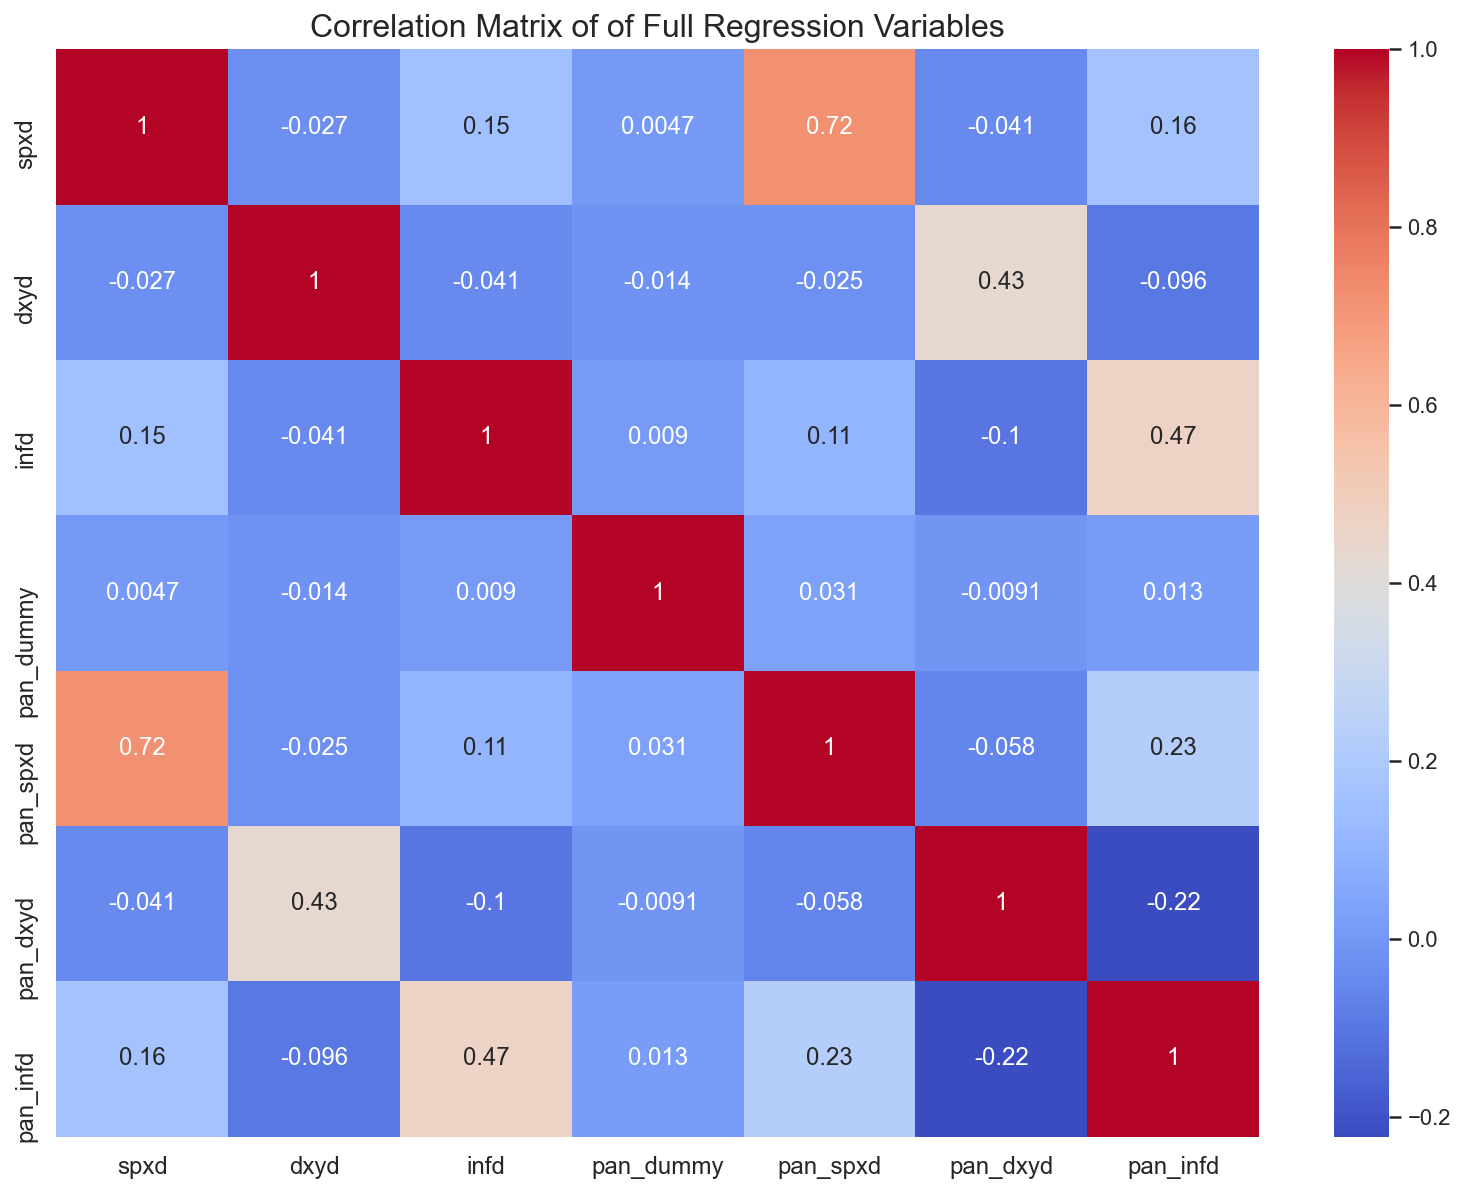

In [63]:
correlation_matrix(X, title='of Full Regression Variables')

In [64]:
ols_full = sm.OLS(y_btc, sm.add_constant(X)).fit(cov_type='HC3')
ols_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   btcd   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.735
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           0.000495
Time:                        19:09:42   Log-Likelihood:                 4217.0
No. Observations:                2632   AIC:                            -8418.
Df Residuals:                    2624   BIC:                            -8371.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.001      3.244      0.001       0.001       0.006
spxd           0.0887      0.154      0.575      0.565      -0.214       0.391
dxyd           0.0792      0.273      0.290      0.772      -0.456       0.614
infd          -0.0006      0.000     -1.947      0.052      -0.001    3.67e-06
pan_dummy     -0.0012      0.002     -0.550      0.582      -0.005       0.003
pan_spxd       0.8265      0.258      3.209      0.001       0.322       1.331
pan_dxyd      -1.1038      0.738     -1.496      0.135      -2.550       0.342
pan_infd       0.0009      0.001      1.464      0.143      -0.000       0.002
==============================================================================
Omnibus:                      386.252   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5785.895
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:                      10.264   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

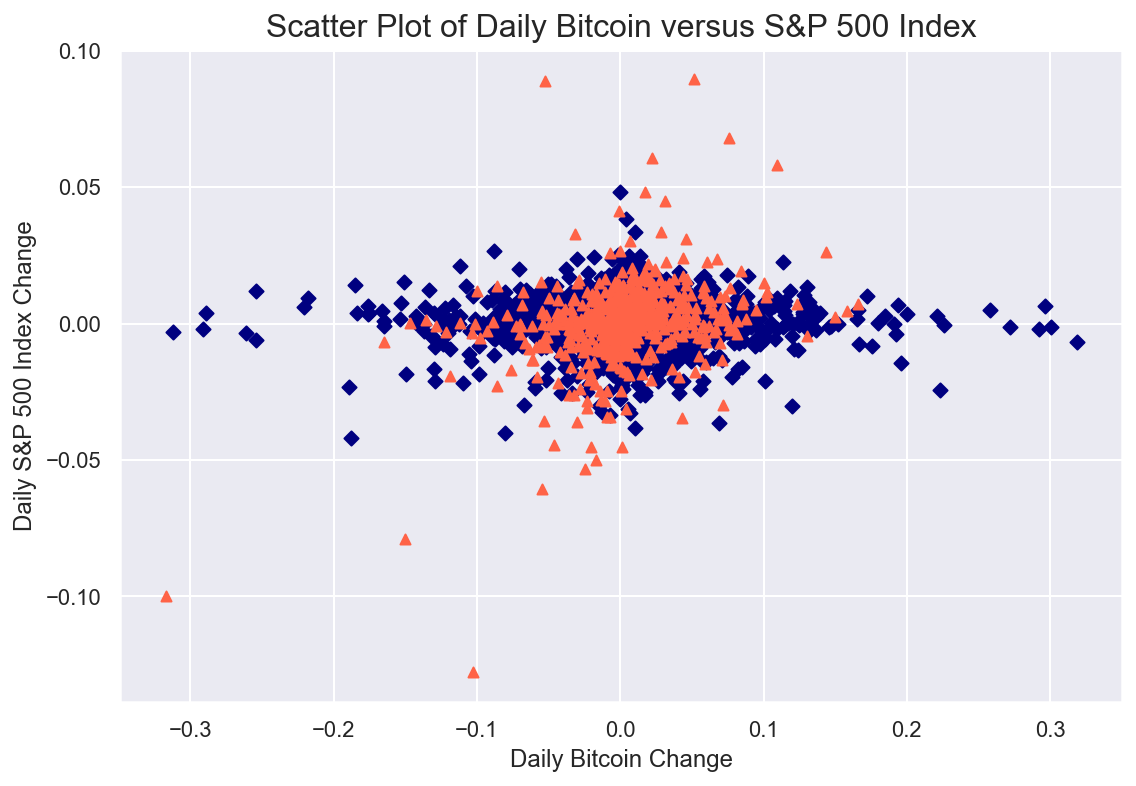

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))

symbols = ["D", "^"]
colors = ["tomato", "navy"]
factor_group = df.groupby(["pan_dummy"])
for values, group in factor_group:
    i, j = values, values
    plt.scatter(group["btcd"], group["spxd"], marker=symbols[j], color=colors[i - 1], s=25)

plt.ylabel('Daily S&P 500 Index Change', fontsize=12)
plt.xlabel('Daily Bitcoin Change', fontsize=12)
plt.title('Scatter Plot of Daily Bitcoin versus S&P 500 Index', fontsize=16);

### Residual charts

In [66]:
predictions = ols_full.fittedvalues.copy()

In [67]:
ols_residuals = y_btc.values.copy() - predictions

C:\Users\Tan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


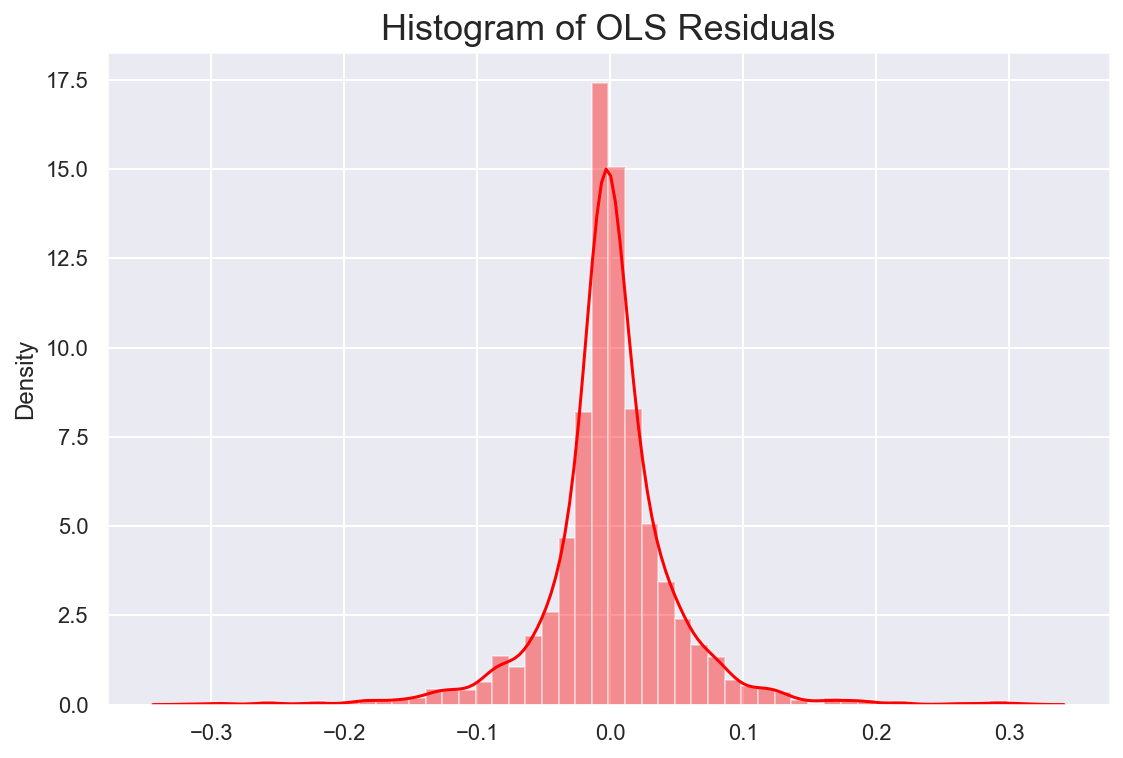

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(ols_residuals, bins=50, color='red', kde=True, ax=ax)
ax.set_title('Histogram of OLS Residuals', fontsize=18);

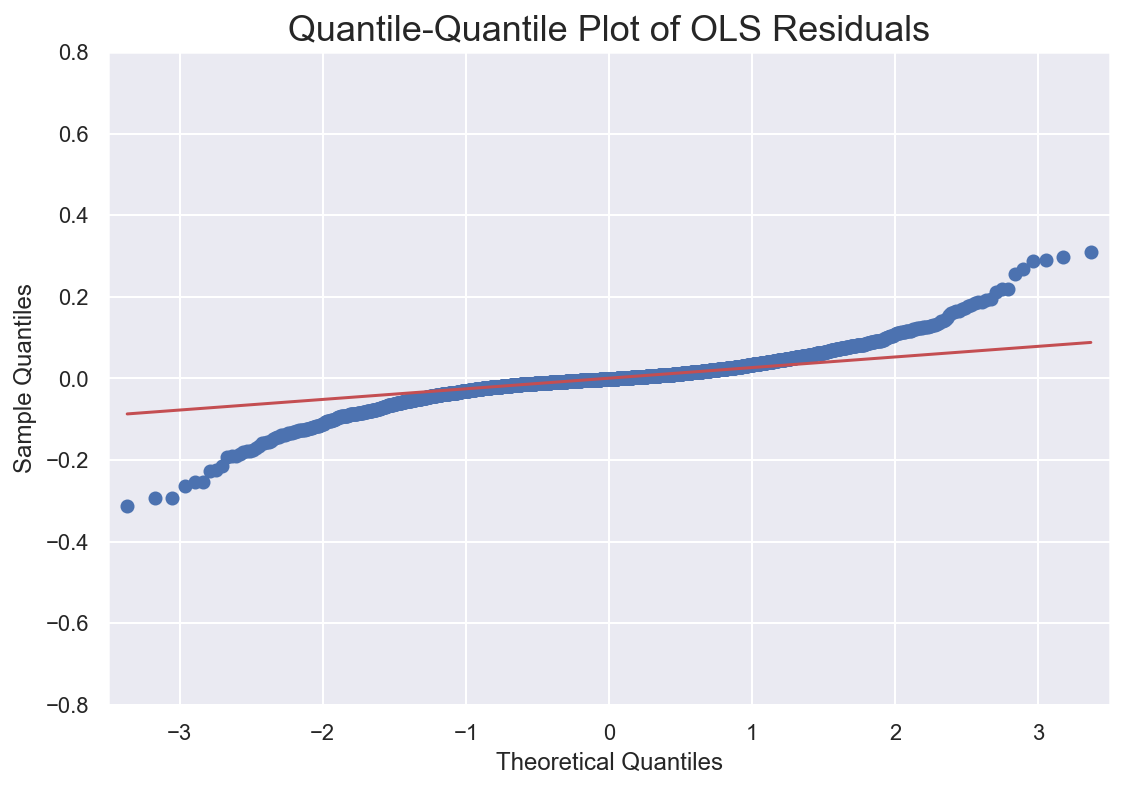

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))

sm.qqplot(ols_residuals, line='q', ax=ax)
ax.set_title('Quantile-Quantile Plot of OLS Residuals', fontsize=18)
ax.set_ylim([-0.8, 0.8]);

Histogram of the linear regression model's residuals show that they are roughly **symmetrically distributed around a zero mean**. There is an indication of **long symmetric tails**, indicating that the model has difficulty predicting the target variable at the extremes of the daily price changes. This is confirmed by the **Q-Q plot of the residuals**. The use of **heteroskedastic-robust standard errors** is therefore required.

### ANOVA Tests of Joint Significance

#### F-test of joint significance of pandemic on either the intercept or coefficients

In [70]:
anovaResults = anova_lm(ols, ols_full)
print(anovaResults)

   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0    2628.0  6.324473      0.0       NaN       NaN       NaN
1    2624.0  6.254114      4.0  0.070359  7.380036  0.000007


#### F-test of joint significance of pandemic on the coefficients only

In [71]:
anovaResults = anova_lm(ols, ols_inter)
print(anovaResults)

   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0    2628.0  6.324473      0.0       NaN       NaN       NaN
1    2625.0  6.254712      3.0  0.069761  9.759223  0.000002


#### F-test of joint significance of pandemic on the intercept only

In [72]:
anovaResults = anova_lm(ols_inter, ols_full)
print(anovaResults)

   df_resid       ssr  df_diff   ss_diff        F    Pr(>F)
0    2625.0  6.254712      0.0       NaN      NaN       NaN
1    2624.0  6.254114      1.0  0.000598  0.25083  0.616533


# Regression using pre-pandemic data only

In [73]:
df_pre = df.loc[df.index < cutoff_date]

In [74]:
y_pre = df_pre['btcd']
X_pre = df_pre[['spxd', 'dxyd', 'infd']]

In [75]:
ols_pre = sm.OLS(y_pre, sm.add_constant(X_pre)).fit(cov_type='HC3')
ols_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   btcd   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.312
Date:                Sat, 12 Feb 2022   Prob (F-statistic):              0.269
Time:                        19:09:43   Log-Likelihood:                 3285.4
No. Observations:                2095   AIC:                            -6563.
Df Residuals:                    2091   BIC:                            -6540.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.001      3.244      0.001       0.001       0.006
spxd           0.0887      0.154      0.575      0.565      -0.214       0.391
dxyd           0.0792      0.273      0.290      0.772      -0.456       0.614
infd          -0.0006      0.000     -1.947      0.052      -0.001    3.67e-06
==============================================================================
Omnibus:                      317.644   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4959.875
Skew:                           0.038   Prob(JB):                         0.00
Kurtosis:                      10.537   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regression using pandemic era data only

In [76]:
df_post = df.loc[df.index >= cutoff_date]

In [77]:
y_post = df_post['btcd']
X_post = df_post[['spxd', 'dxyd', 'infd']]

In [78]:
ols_post = sm.OLS(y_post, sm.add_constant(X_post)).fit(cov_type='HC3')
ols_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   btcd   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     7.325
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           8.08e-05
Time:                        19:09:43   Log-Likelihood:                 946.43
No. Observations:                 537   AIC:                            -1885.
Df Residuals:                     533   BIC:                            -1868.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.002      1.310      0.190      -0.001       0.006
spxd           0.9152      0.206      4.439      0.000       0.511       1.319
dxyd          -1.0246      0.685     -1.495      0.135      -2.368       0.318
infd           0.0003      0.001      0.602      0.547      -0.001       0.001
==============================================================================
Omnibus:                       51.139   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.753
Skew:                          -0.277   Prob(JB):                     7.03e-49
Kurtosis:                       6.099   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Rolling R-squared of Full Model

In [79]:
params2 = rolling_ols(252, y_btc, X)

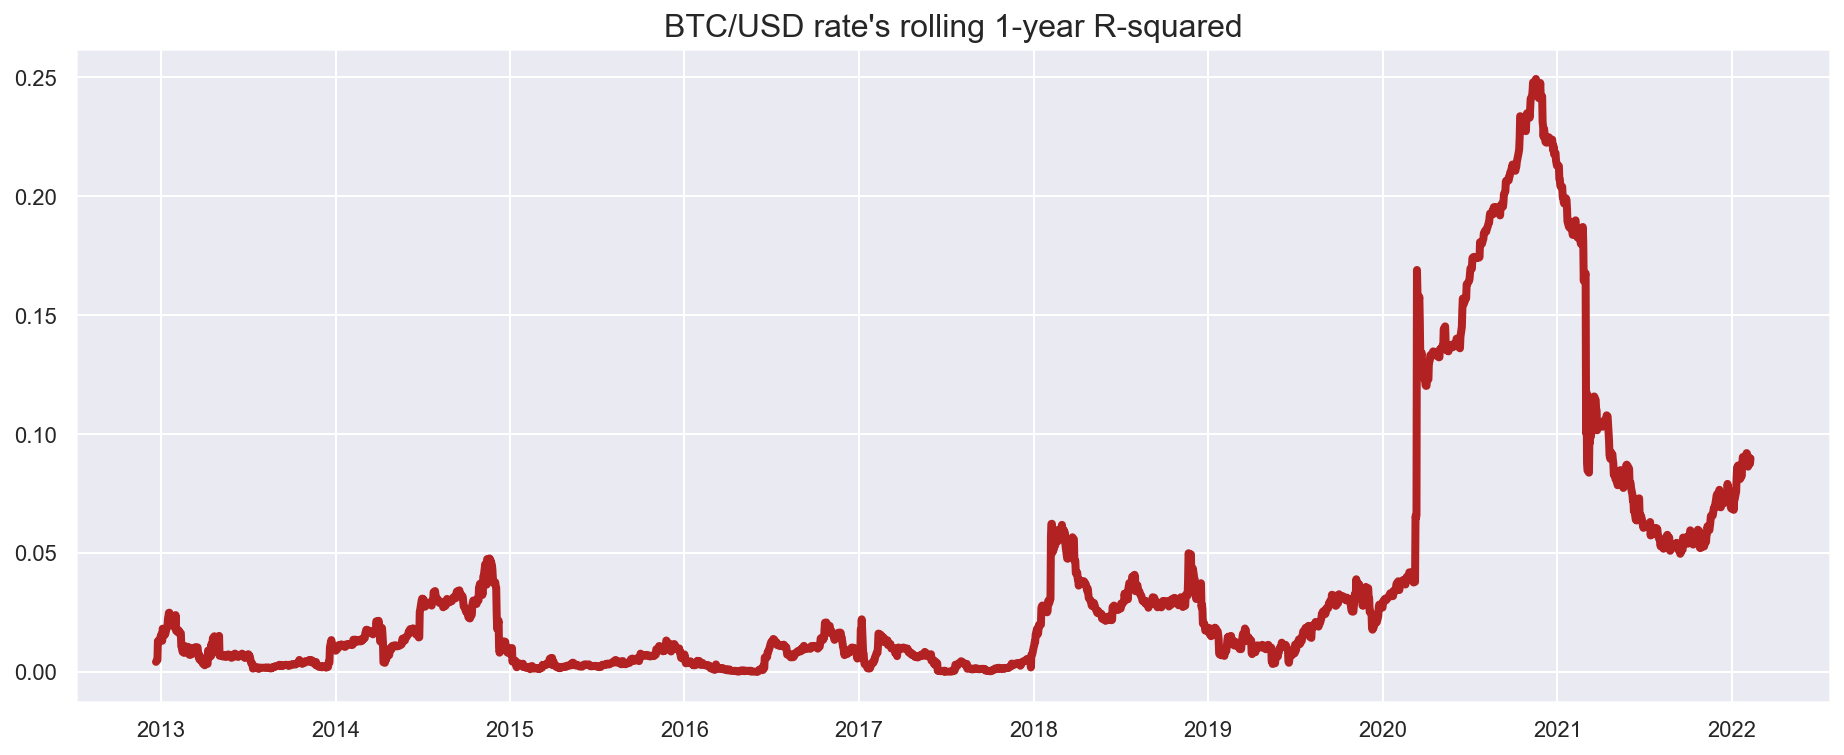

In [80]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(params2.rsqr, lw='4', color='firebrick', )
plt.title("BTC/USD rate's rolling 1-year R-squared", fontsize=16);

The **rolling R-squared** shows the **increased impact of the macro-financial variables on Bitcoin prices** since the pandemic's onset in early 2020. The R-squared in the pandemic era is consistently above that in the pre-pandemic period. That said, the R-squared remains **relatively low**, indicating that much of Bitcoin's price fluctuations are not explained by the macro factors.